In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import warnings
warnings.filterwarnings('ignore')
import keras
from matplotlib import pyplot as plt

In [2]:
local_zip = 'kagglecatsanddogs_3367a.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(r'C:\Users\golub\Desktop\neural networks\neural networks')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='kagglecatsanddogs_3367a.zip' mode='r'>>

In [3]:
#Готовим папки для размещения фотографий
os.mkdir(r'C:\Users\golub\Desktop\neural networks\neural networks\cats-v-dogs')
os.mkdir(r'C:\Users\golub\Desktop\neural networks\neural networks\cats-v-dogs/training')
os.mkdir(r'C:\Users\golub\Desktop\neural networks\neural networks\cats-v-dogs/testing')
os.mkdir(r'C:\Users\golub\Desktop\neural networks\neural networks\cats-v-dogs\training\cats')
os.mkdir(r'C:\Users\golub\Desktop\neural networks\neural networks\cats-v-dogs\training\dogs')
os.mkdir(r'C:\Users\golub\Desktop\neural networks\neural networks\cats-v-dogs\testing\cats')
os.mkdir(r'C:\Users\golub\Desktop\neural networks\neural networks\cats-v-dogs\testing\dogs')

In [4]:
#разбиваем данные
from random import sample
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    f = os.listdir(SOURCE)
    train = sample(f,int(SPLIT_SIZE*len(f)))
    test = list(set(f) - set(train))
    train_2 = [(SOURCE + i) for i in train]
    dest_train = [(TRAINING+i) for i in train]
    for i,j in zip(train_2,dest_train):
        if os.path.getsize(i)>0:
            copyfile(i, j)
        else:
            print(i)
  
    test_2 = [(SOURCE + i) for i in test]
    dest_test = [(TESTING +i) for i in test]
    print(len(test_2),len(train_2),len(f))
    for m,l in zip(test_2, dest_test):
        if os.path.getsize(m)>0:
            copyfile(m, l)
        else:
            print(m)
#другой вариант разбивки
#     all_files=[]
#     for file_name in os.listdir(SOURCE):
#         file_path = SOURCE + file_name
        
#         if os.path.getsize(file_path):
#             all_files.append(file_name)
#         else:
#             pass
#     n_files = len(all_files)
#     split_point=int(n_files*SPLIT_SIZE)
#     shuffled=random.sample(all_files,n_files)
#     train_set=shuffled[:split_point]
#     test_set=shuffled[split_point:]
    
#     for file_name in train_set:
#         copyfile(SOURCE+file_name,TRAINING+file_name)
        
#     for file_name in test_set:
#         copyfile(SOURCE+file_name,TESTING+file_name)

In [5]:
#задаем значение переменных

CAT_SOURCE_DIR = r"C:\Users\golub\Desktop\neural networks\neural networks/PetImages/Cat/"
TRAINING_CATS_DIR = r"C:\Users\golub\Desktop\neural networks\neural networks/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = r"C:\Users\golub\Desktop\neural networks\neural networks/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = r"C:\Users\golub\Desktop\neural networks\neural networks/PetImages/Dog/"
TRAINING_DOGS_DIR = r"C:\Users\golub\Desktop\neural networks\neural networks/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = r"C:\Users\golub\Desktop\neural networks\neural networks/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)
#смотрим на количество изображений в папках
print(len(os.listdir(r'C:\Users\golub\Desktop\neural networks\neural networks/cats-v-dogs/training/cats/')))
print(len(os.listdir(r'C:\Users\golub\Desktop\neural networks\neural networks/cats-v-dogs/training/dogs/')))
print(len(os.listdir(r'C:\Users\golub\Desktop\neural networks\neural networks/cats-v-dogs/testing/cats/')))
print(len(os.listdir(r'C:\Users\golub\Desktop\neural networks\neural networks/cats-v-dogs/testing/dogs/')))

1251 11250 12501
C:\Users\golub\Desktop\neural networks\neural networks/PetImages/Cat/666.jpg
C:\Users\golub\Desktop\neural networks\neural networks/PetImages/Dog/11702.jpg
1251 11250 12501
11250
11249
1250
1251


In [21]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16,(3,3),activation=tf.nn.relu,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [22]:
#используем ImageDataGenerator

TRAINING_DIR = r"C:\Users\golub\Desktop\neural networks\neural networks//cats-v-dogs/training"
train_datagen = ImageDataGenerator(
                                  rescale = 1/255,
      rotation_range=40,
      width_shift_range=0.3,
      height_shift_range=0.3,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
     # fill_mode='nearest'
                                  )
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,                                                  
                                                   batch_size=20,
                                                   target_size=(150,150),
                                                   class_mode='binary')

VALIDATION_DIR = r"C:\Users\golub\Desktop\neural networks\neural networks//cats-v-dogs/testing"
validation_datagen = ImageDataGenerator(
                                        rescale = 1/255,
)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,                                      
                                                   batch_size=20,
                                                   target_size=(150,150),
                                                   class_mode='binary')

Found 22497 images belonging to 2 classes.
Found 2501 images belonging to 2 classes.


In [23]:
history = model.fit_generator(train_generator,
                              epochs=13,
                              verbose=1,
                              validation_data=validation_generator)


Epoch 1/13
1125/1125 [==============================] - 357s 317ms/step - loss: 0.6862 - acc: 0.5697 - val_loss: 0.5540 - val_acc: 0.7273
Epoch 2/13
1125/1125 [==============================] - 337s 300ms/step - loss: 0.6130 - acc: 0.6617 - val_loss: 0.6062 - val_acc: 0.6757
Epoch 3/13
1125/1125 [==============================] - 339s 301ms/step - loss: 0.5889 - acc: 0.6867 - val_loss: 0.5469 - val_acc: 0.7393
Epoch 4/13
1125/1125 [==============================] - 332s 295ms/step - loss: 0.5735 - acc: 0.7056 - val_loss: 0.5458 - val_acc: 0.7285
Epoch 5/13
1125/1125 [==============================] - 353s 314ms/step - loss: 0.5575 - acc: 0.7160 - val_loss: 0.4866 - val_acc: 0.7781
Epoch 6/13
1125/1125 [==============================] - 353s 314ms/step - loss: 0.5549 - acc: 0.7246 - val_loss: 0.5126 - val_acc: 0.7565
Epoch 7/13
1125/1125 [==============================] - 417s 371ms/step - loss: 0.5426 - acc: 0.7323 - val_loss: 0.4982 - val_acc: 0.7737
Epoch 8/13
1125/1125 [============

In [24]:
#Попробуем через готовую нейросеть научиться определять котят и собак )
from keras.applications import DenseNet201

conv_base = DenseNet201(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150, 3))

In [25]:
conv_base.trainable = False

In [26]:
from keras.models import Sequential
from keras import layers

model_DN = Sequential()
model_DN.add(conv_base)
model_DN.add(layers.Flatten())
model_DN.add(layers.Dense(256, activation='relu'))
model_DN.add(layers.Dense(1, activation = 'sigmoid'))

In [27]:
model_DN.compile(loss='binary_crossentropy',
             optimizer = 'Adam',
             metrics = ['acc'])

In [28]:
callbacks_list = [keras.callbacks.EarlyStopping(
        monitor = 'acc',
        patience = 1),
                  keras.callbacks.ModelCheckpoint(
        filepath='densenet201.h5',
        monitor='loss',
        save_best_only=True)]

In [29]:
model_training = model_DN.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.n//20,
    validation_steps=validation_generator.n//20,
    epochs = 2,
    callbacks = callbacks_list,
    verbose =1 )

Epoch 1/2
1124/1124 [==============================] - 1265s 1s/step - loss: 0.6705 - acc: 0.9052 - val_loss: 0.0886 - val_acc: 0.9688
Epoch 2/2
1124/1124 [==============================] - 1276s 1s/step - loss: 0.1423 - acc: 0.9412 - val_loss: 0.0542 - val_acc: 0.9772


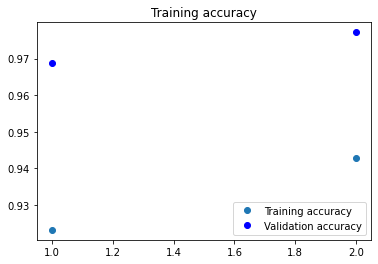

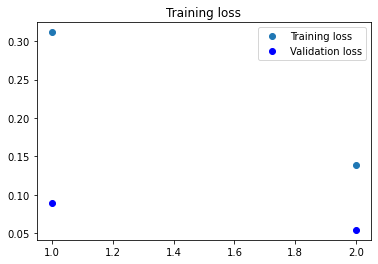

In [30]:
acc = model_training.history['acc']
val_acc= model_training.history['val_acc']
loss =  model_training.history['loss']
val_loss =  model_training.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'o', label='Training accuracy')
plt.plot(epochs, val_acc, 'bo', label='Validation accuracy')

plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'o', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training loss')
plt.legend()